In [170]:
import numpy as np
import random
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

In [10]:
data=pd.read_csv('HistoricalQuotes.csv')
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [11]:
data.isnull().values.any()

False

In [12]:
#rename column to remove spaces in column names
aapl =data.rename(columns={' Close/Last': 'close', ' Volume': 'volume',
                           ' Open':'open',' High':'high',' Low':'low'})


In [13]:
#change date string into date format and sort the dataframe in ascending order
aapl[['Date']] = aapl[['Date']].applymap(lambda x: datetime.strptime(x,'%m/%d/%Y').date())
aapl =aapl.sort_values(by='Date')


In [14]:
#change dataframe dtypes to float
cols = [i for i in aapl if i not in ['Date','volume']]
def to_float(x):
    x = x.strip()
    return float(x[1:])

aapl[cols]=aapl[cols].applymap(to_float)
aapl.head()

,Date,close,volume,open,high,low
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614


In [15]:
#Create Signals using Talib library
aapl['Short EMA'] = ta.SMA(np.array(aapl['close']),20)
aapl['Long EMA'] = ta.EMA(np.array(aapl['close']), timeperiod = 50)
aapl['RSI'] = ta.RSI(np.array(aapl['close']), timeperiod = 14)
aapl['MOMENTUM'] = ta.MOM(np.array(aapl['close']), timeperiod=5)
aapl['CCI'] = ta.CCI(np.array(aapl['high']), np.array(aapl['low']), np.array(aapl['close']), timeperiod=14)

In [16]:
# create a list of our conditions for moving average cross over buy signal generation
conditions = [
    (aapl['Short EMA'] > aapl['Long EMA']),
    (aapl['Short EMA'] < aapl['Long EMA']),
    ]
# create a list of the values we want to assign for each condition 1: buy, 0:sell
values = [1, 0]
# create a new column and use np.select to assign values to it using our lists as arguments
aapl['EMA_SIGNAL'] = np.select(conditions, values)

In [17]:
# create a list of our conditions for relative strength index rsi signal generation
conditions = [
    (aapl['RSI'] < 30 ),
    (aapl['RSI'] > 70),
    ]

# create a list of the values we want to assign for each condition 1: buy, 0:sell
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
aapl['RSI_SIGNAL'] = np.select(conditions, values)

In [18]:
# create a list of our conditions for  Momentum signal generation
conditions = [
    (aapl['MOMENTUM'] > 0 ),
    (aapl['MOMENTUM'] <= 0),
    ]

# create a list of the values we want to assign for each condition 1: buy, 0: sell
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
aapl['MOMENTUM_SIGNAL'] = np.select(conditions, values)

In [19]:
# create a list of our conditions for CCI signal generation
conditions = [
    (aapl['CCI'] > 100 ),
    (aapl['CCI'] <= 100),
    ]

# create a list of the values we want to assign for each condition 1: buy, 0: sell
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
aapl['CCI_SIGNAL'] = np.select(conditions, values)

In [20]:
aapl.head(1)

,Date,close,volume,open,high,low,Short EMA,Long EMA,RSI,MOMENTUM,CCI,EMA_SIGNAL,RSI_SIGNAL,MOMENTUM_SIGNAL,CCI_SIGNAL
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.35,NaN,NaN,NaN,NaN,NaN,0,0,0,0


#Genetic Algorithmn
Step 1: Data Preprocessing
Step 2: Signal Generation. EMA crossover, RSI,mOM
Step 3: Design Fitness function
Step 4: Generate Population
        a) Design Chromosone
        b) Generate population for entry rule
        c) Generate population for exit rule

Step 5: Genetic Operators
        a)Fitness Function
        b) Crossover
        c) Mutation
Step 6: 

##Chromosone Encoding
Construct two groups of chromosones; for buy signal and exit signal
Connectors:
    AND and:  (00)
    OR or:    (01)
    NOT not:  (11)
     XOR  ^:   (10)
    
    
Chromosone structure : [RSI,connector,connector,EMACROSSOVER,connector,connector,MOMENTUM,connector,connector,CCI]


In [75]:
##Initialize Chromosone population
import random

def init_population(n):
    population =[]
    for i in range(n):
        # [RSI,connector,connector,EMA_CROSSOVER,connector,connector,MOMENTUM,connector,connector,CCI]
        entry_chromosone = [random.randint(0, 1) for _ in range(10)]
        exit_chromosone = [random.randint(0, 1) for _ in range(10)]
        chromosone_pair = {"entry_chromosone":entry_chromosone,
                          "exit_chromosone":exit_chromosone,
                           "fitness":1}
        population.append(chromosone_pair)
            
    return population



In [35]:
init_population(2)

[{'entry_chromosone': [1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
  'exit_chromosone': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
  'fitness': 0},
 {'entry_chromosone': [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
  'exit_chromosone': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
  'fitness': 0}]

In [23]:
# convert boolean connectors to python boolean key words
def convert_2pythonkey(chromosone):
    #[RSI,connector,connector,EMACROSSOVER,connector,connector,MOMENTUM,connector,connector,CCI]
    connectors = {'00':'and',
                 '01':'or',
                 '11':'!=',
                 '10':'^'}
    
    chromosone_connectors = [
                        connectors[str(chromosone[1])+str(chromosone[2])],
                        connectors[str(chromosone[4])+str(chromosone[5])],
                        connectors[str(chromosone[7])+str(chromosone[8])]
                       ]
    return chromosone_connectors
#test function
x =[1,0,1,0,1,0,1,1,1,0]

convert_2pythonkey(x)

['or', '^', '!=']

In [177]:
#Fitness function
""" 

[RSI,connector,coonector,EMACROSSOVER,connector,connector,MOMENTUM,connector,connector,CCI]
get entry and exit chromosones
initialize cost = 0
initialize market_position = out 
transverse the dataframe
find rows with matching entry position strategy and add to cost with price
change status to'in' market
if status is 'in' find rows matching exit chromosone 
calculate profit
if there is no exit till the last; profit = last day SP- entry price"""
def fitness_function(data,entry_chromosone,exit_chromosone):
    # Get the entry strategy chromosone
    entry = entry_chromosone
    #Get the exit strategy chromosone
    exit = exit_chromosone
    #Convert the bool connectors to python keywords for use in strategy
    entry_connectors = convert_2pythonkey(entry)
    exit_connectors = convert_2pythonkey(exit)
    market_position = 'out'
    capital = 1000
    number_of_trades = 0
    for date in data.itertuples():
        if market_position == 'out':
            if eval("date.CCI_SIGNAL == entry[9] {} date.MOMENTUM_SIGNAL == entry[6] {} date.EMA_SIGNAL== entry[3] {} date.RSI_SIGNAL == entry[0]".format(entry_connectors[2],entry_connectors[1],entry_connectors[0])):
                cost_price = date.close
                shares= capital/cost_price
                market_position = 'in'
                number_of_trades +=1
        elif market_position == 'in':
            if eval("date.CCI_SIGNAL == exit[9] {} date.MOMENTUM_SIGNAL == exit[6] {} date.EMA_SIGNAL== exit[3] {} date.RSI_SIGNAL ==exit[0]".format(exit_connectors[2],exit_connectors[1],exit_connectors[0])) :
                sell_price =date.close
                
                trade_profit = sell_price - cost_price
                trade_return = trade_profit * shares
                capital += trade_return
                
                market_position ='out'
    fitness = (capital - 1000)/1000 *100    
    if  number_of_trades > 0 and fitness > 0:
        return round(fitness,2)
    return False


In [178]:
##Evaluate Chromosones

def evaluate_chromosones(data,population):
    fit_chromosones = []

    for chromosone in population:

        entry = chromosone["entry_chromosone"]
        exit = chromosone["exit_chromosone"]
        fitness = fitness_function(data,entry,exit)
        if fitness:
            chromosone["fitness"] = fitness
            fit_chromosones.append(chromosone)
    return fit_chromosones



In [179]:
# Select parents

def roulette_wheel_selection(population):
  
    # Computes the totallity of the population fitness
    population_fitness = sum([chromosome['fitness'] for chromosome in population])
    
    # Computes for each chromosome the probability 
    chromosome_probabilities = [chromosome['fitness']/population_fitness for chromosome in population]
    
    # Selects one chromosome based on the computed probabilities
    return np.random.choice(population, p=chromosome_probabilities)

def selection(population):
    selected = []
    for i in range(len(population)):
        selected.append(roulette_wheel_selection(population))
    return selected

In [180]:
### Crossover
def crossover(parent1,parent2,r_cross):
    child1={}
    child2={}
    # check for recombination
    if random.random() < r_cross:
        # select crossover point that is not on the end of the string
        index = random.randint(1, len(parent1["entry_chromosone"])-2)
        # perform crossover
        child1 = {"entry_chromosone":parent2["entry_chromosone"][:index] + parent1["entry_chromosone"][index:],
                              "exit_chromosone":parent2["exit_chromosone"][:index] + parent1["exit_chromosone"][index:],
                               "fitness":0}
        child2 = {"entry_chromosone":parent1["entry_chromosone"][:index] + parent2["entry_chromosone"][index:],
                              "exit_chromosone":parent1["exit_chromosone"][:index] + parent2["exit_chromosone"][index:],
                               "fitness":0}
    else:
        child1 = parent1
        child2 = parent2
    return child1,child2
    

In [181]:
###Mutation

def mutation(chromosone, r_mut):
    for i in range(len(chromosone)):
        # check for a mutation
        if random.random() < r_mut:
            # flip the bit
            chromosone[i] = 1 - chromosone[i]
    return chromosone

In [182]:
## Simple Genetic Algorithm 
def genetic_algorithm(data, n_pop,n_iter, r_cross, r_mut):
    ##Initialise Population
    population = init_population(n_pop)
    ##Keep track of the best pair
    best = population[0]
    
    ## Loop for n_iter  times
    
    for generation in range(n_iter):
        ## Calculate Population Fitness
        population = evaluate_chromosones(data,population)
        ## Select the chromosone pair with the best fitness
        for chromosone_pair in population:
            if chromosone_pair["fitness"] > best["fitness"]:
                best = chromosone_pair
        ## Select the fittest for reproduction using roulette_wheel_selection
        selected_population = selection(population)
        ## Create New Population using  a single point crossover
        children = []
        for i in range(0, len(selected_population)-1, 2):
            
            # get selected parents in pairs
            parent1,parent2 = selected_population[i],selected_population[i+1]
            #crossover and mutation 
            
            child1,child2 = crossover(parent1,parent2,r_cross)
            child1["entry_chromosone"] = mutation(child1["entry_chromosone"],r_mut)
            child1["exit_chromosone"] = mutation(child1["exit_chromosone"],r_mut)
            child2["entry_chromosone"] = mutation(child2["entry_chromosone"],r_mut)
            child2["exit_chromosone"] = mutation(child2["exit_chromosone"],r_mut)
            children.append(child1)
            children.append(child2)
            
        population = children
        
    return best
       


In [183]:
#split data
train = aapl[(aapl['Date'] <= date(2016,12,31))]
test = aapl[(aapl['Date'] > date(2016,12,31))]

In [188]:
#genetic_algorithm( n_pop.n_iter, r_cross, r_mut)

genetic_algorithm(train,50,100,0.9, 0.01)

{'entry_chromosone': [0, 0, 1, 0, 0, 1, 1, 0, 1, 1],
 'exit_chromosone': [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 'fitness': 452.43}

#[RSI,connector,connector,EMACROSSOVER,connector,connector,MOMENTUM,connector,connector,CCI]
    connectors = {'00':'and',
                 '01':'or',
                 '11':'!=',
                 '10':'^'}
    
RSI: 0 or EMA 0  or  MOM 1 or CCI 1

RSI: 0 and EMA 1 OR MOM 0 and CCI 0


In [189]:
fitness_function(test,[0, 0, 1, 0, 0, 1, 1, 0, 1, 1],[0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

68.89

In [198]:
test.head()


,Date,close,volume,open,high,low,Short EMA,Long EMA,RSI,MOMENTUM,CCI,EMA_SIGNAL,RSI_SIGNAL,MOMENTUM_SIGNAL,CCI_SIGNAL
793,2017-01-03,116.15,28769220,115.80,116.3300,114.76,114.8905,113.437575,59.216454,-0.37,-68.366859,1,0,0,0
792,2017-01-04,116.02,21081620,115.85,116.5100,115.75,115.2360,113.538847,58.318409,-1.24,-41.141128,1,0,0,0
791,2017-01-05,116.61,22115100,115.92,116.8642,115.81,115.5690,113.659284,61.194745,-0.15,-4.387907,1,0,0,0
790,2017-01-06,117.91,31714820,116.78,118.1600,116.47,115.9130,113.825979,66.654883,1.18,139.158937,1,0,1,1
789,2017-01-09,118.99,33420290,117.95,119.4300,117.94,116.2565,114.028490,70.383226,3.17,235.341126,1,0,1,1


In [213]:
p = 273.36 - 116.15
s = 1000/116.15
capital = s * p
r =round((capital - 1000)/1000 *100,2) 

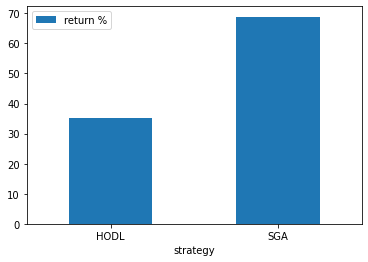

In [225]:
# multiple lines with legend
l = ["HODL","SGA"]
data = pd.DataFrame([[r,68.89]],columns=l)
df = pd.DataFrame({'strategy':l, 'return %':[r,68.89]})
ax = df.plot.bar(x='strategy', y='return %', rot=0)

In [97]:
 for i in range(0, 3, 2):
            # get selected parents in pairs
            print(i)
            print(i+1)

0
1
2
3
